In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df[df['stroke']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
id,4861.000000,36487.236371,21120.133386,67.000000,17762.000000,36958.000000,54497.000000,72940.000000
age,4861.000000,41.971545,22.291940,0.080000,24.000000,43.000000,59.000000,82.000000
hypertension,4861.000000,0.088871,0.284586,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,4861.000000,0.047110,0.211895,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,4861.000000,104.795513,43.846069,55.120000,77.120000,91.470000,112.830000,267.760000
bmi,4700.000000,28.823064,7.908287,10.300000,23.400000,28.000000,33.100000,97.600000
stroke,4861.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df[df['stroke']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
id,249.000000,37115.068273,21993.344872,210.000000,17013.000000,36706.000000,56669.000000,72918.000000
age,249.000000,67.728193,12.727419,1.320000,59.000000,71.000000,78.000000,82.000000
hypertension,249.000000,0.265060,0.442254,0.000000,0.000000,0.000000,1.000000,1.000000
heart_disease,249.000000,0.188755,0.392102,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,249.000000,132.544739,61.921056,56.110000,79.790000,105.220000,196.710000,271.740000
bmi,209.000000,30.471292,6.329452,16.900000,26.400000,29.700000,33.700000,56.600000
stroke,249.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


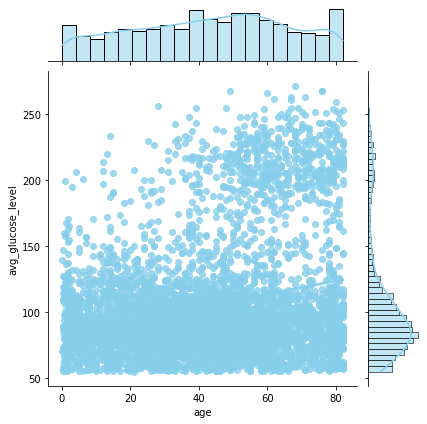

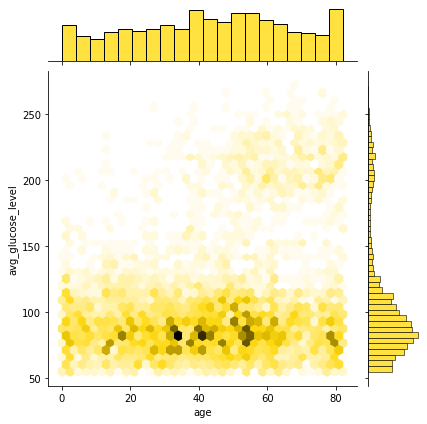

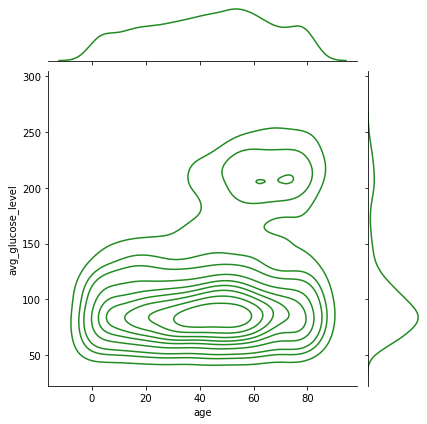

In [8]:
#joint plot 
# type 2 : many types (reg, hex, kde)
sns.jointplot(data=df, x='age', y='avg_glucose_level', kind='reg', color='skyblue')
sns.jointplot(data=df, x='age', y='avg_glucose_level', kind='hex', color='gold')
sns.jointplot(data=df, x='age', y='avg_glucose_level', kind='kde', color='forestgreen' )
plt.show()

In [9]:
#3=skewness refers to the geometry shape : negative and positive skewness
print( f"Skewness: {df['stroke'].skew()}")
#K = 0 >> the shape is normal >> center at the middle 
#K < 0 the shape is flatten >> highly dispersed
#k > 0 the shape is peaks sharply
print( f"Kurtosis: {df['stroke'].kurtosis()}")

Skewness: 4.193284486071313
Kurtosis: 15.58973628641584


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


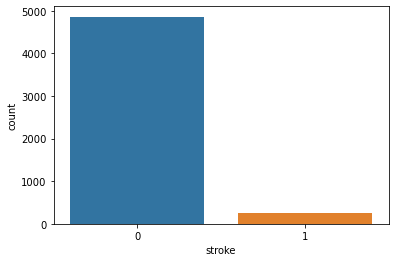

In [10]:
sns.countplot(df['stroke'], label="Count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


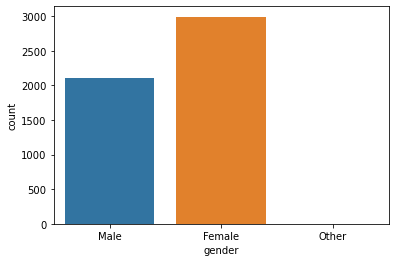

In [11]:
sns.countplot(df['gender'], label="Count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


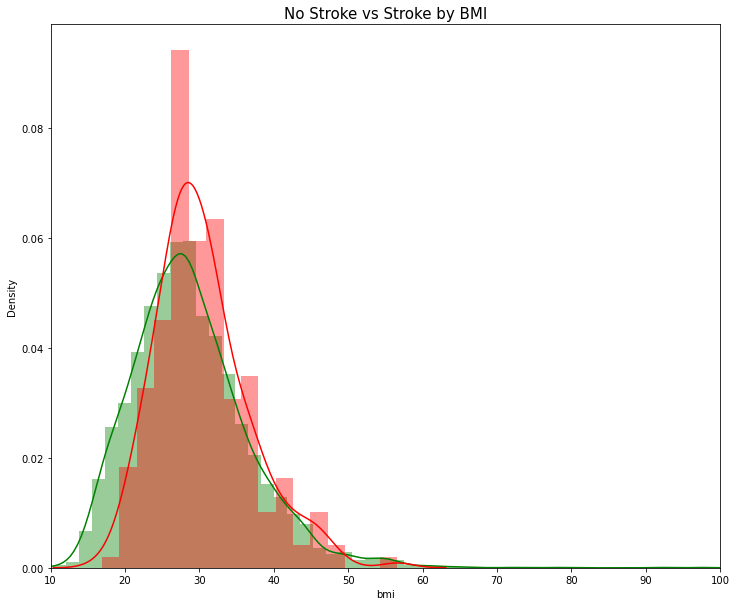

In [12]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


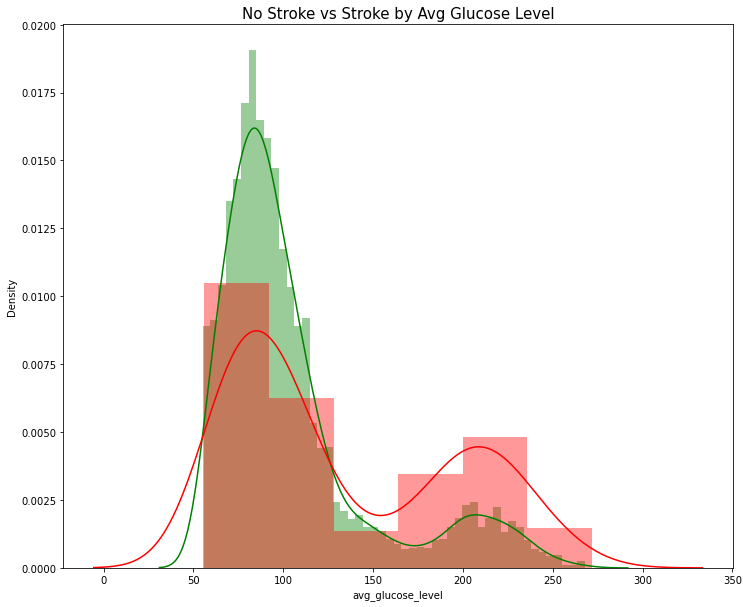

In [13]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg Glucose Level', fontsize=15)
plt.show()

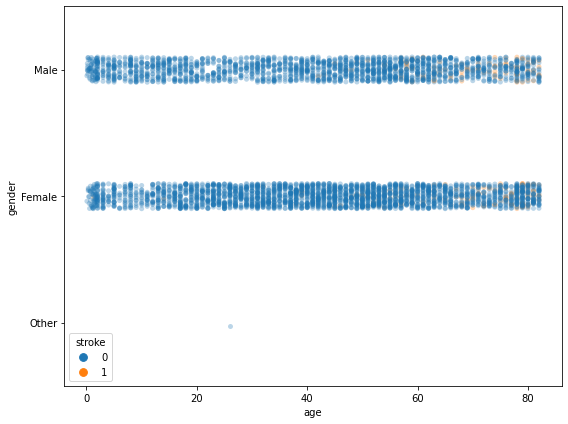

In [14]:
plt.figure(figsize=(8,6))

ax = sns.stripplot(y='gender', x='age', hue='stroke',alpha=0.3, data=df)
plt.tight_layout()


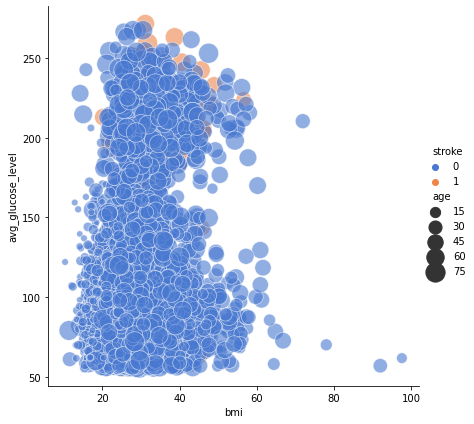

In [15]:
sns.relplot(x="bmi", y="avg_glucose_level", hue="stroke", size="age",
            sizes=(40, 400), alpha=0.6, palette="muted",
            height=6, data=df)

In [16]:
print( f"Skewness: {df['stroke'].skew()}")

Skewness: 4.193284486071313


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


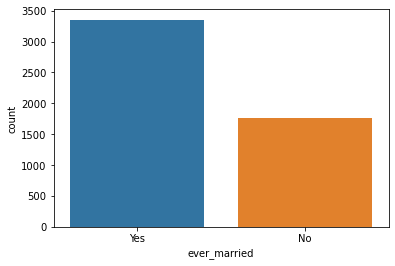

In [17]:
sns.countplot(df['ever_married'], label="Count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


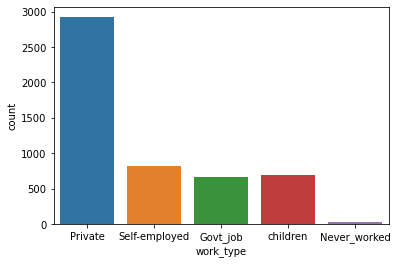

In [18]:
sns.countplot(df['work_type'], label="Count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


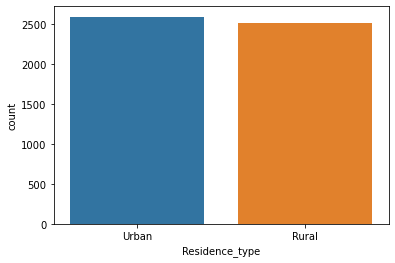

In [19]:
sns.countplot(df['Residence_type'], label="Count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


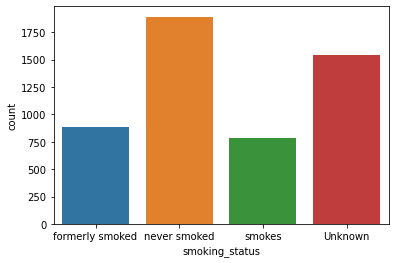

In [20]:
sns.countplot(df['smoking_status'], label="Count")
plt.show()

In [21]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [22]:
df.loc[df.gender == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [23]:
missing_value = (df.isnull().sum())
print(missing_value[missing_value > 0])

bmi    201
dtype: int64


In [24]:
male_mean_bmi = df[df["gender"]=="Male"]["bmi"].mean()
female_mean_bmi = df[df["gender"]=="Female"]["bmi"].mean()
print("male mean bmi: %1.5f " %male_mean_bmi)
print("female mean bmi: %1.5f " %female_mean_bmi)

male mean bmi: 28.64794 
female mean bmi: 29.06576 


In [25]:
#fill missing value with mean value
#df.bmi.fillna(value=df.bmi.mean(), inplace=True)
df.loc[(df["gender"]=="Male") & (df["bmi"].isnull()), "bmi"]= male_mean_bmi
df.loc[(df["gender"]=="Female") & (df["bmi"].isnull()), "bmi"]= female_mean_bmi

In [26]:
df.loc[df["gender"]=="Female"].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,29.065758,Unknown,1


In [27]:
df.loc[df["gender"]=="Male"].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.647936,Unknown,1


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,2.167710,1.090293,0.00,2.000,2.000,3.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.891519,7.698134,10.30,23.800,28.400,32.80,97.60
smoking_status,5110.0,1.376908,1.071534,0.00,0.000,2.000,2.00,3.00


In [28]:
# Categorical columns in the training data
object_cols = [col for col in df.columns if df[col].dtype == "object"]

print('Categorical columns that will be ordinal encoded:', object_cols)

Categorical columns that will be ordinal encoded: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [32]:
ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])    

In [33]:
X = df.drop('stroke', axis=1)
y = df['stroke']


In [34]:
from imblearn.over_sampling import SMOTE
#Oversampling the data

smote = SMOTE()
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


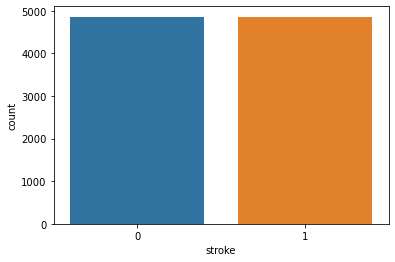

In [35]:
sns.countplot(y_SMOTE, label="Count")
plt.show()

In [36]:
#building decision tree model
decision_tree = dtc(random_state=0)
decision_tree.fit(X_SMOTE, y_SMOTE)

#building Random Forest model
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X_SMOTE, y_SMOTE)

#building KNN model
knn = KNeighborsClassifier()
knn.fit(X_SMOTE, y_SMOTE)

#building Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_SMOTE, y_SMOTE)

#building scv model
scv = SVC()
scv.fit(X_SMOTE, y_SMOTE)

SVC()

In [37]:
#evaluation decision tree model
predict = cross_val_predict(estimator = decision_tree, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))
confusion_matrix(y_SMOTE, predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4861
           1       0.93      0.94      0.94      4861

    accuracy                           0.94      9722
   macro avg       0.94      0.94      0.94      9722
weighted avg       0.94      0.94      0.94      9722



array([[4520,  341],
       [ 268, 4593]], dtype=int64)

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decision_tree, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.74 %
Standard Deviation: 5.09 %


In [39]:
#evaluation Random Forest model
predict = cross_val_predict(estimator = random_forest, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))
confusion_matrix(y_SMOTE, predict)
accuracies = cross_val_score(estimator = random_forest, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      4861
           1       0.99      0.95      0.97      4861

    accuracy                           0.97      9722
   macro avg       0.97      0.97      0.97      9722
weighted avg       0.97      0.97      0.97      9722

Accuracy: 96.99 %
Standard Deviation: 6.57 %


In [45]:
#evaluation KNN model
predict = cross_val_predict(estimator = knn, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))
confusion_matrix(y_SMOTE, predict)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      4861
           1       0.77      0.86      0.81      4861

    accuracy                           0.80      9722
   macro avg       0.81      0.80      0.80      9722
weighted avg       0.81      0.80      0.80      9722

Accuracy: 96.99 %
Standard Deviation: 6.57 %


In [43]:
#evaluation Naive Bayes model
predict = cross_val_predict(estimator = gnb, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))
confusion_matrix(y_SMOTE, predict)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.66      0.76      4861
           1       0.73      0.93      0.82      4861

    accuracy                           0.80      9722
   macro avg       0.82      0.80      0.79      9722
weighted avg       0.82      0.80      0.79      9722

Accuracy: 96.99 %
Standard Deviation: 6.57 %


In [44]:
#evaluation scv model
predict = cross_val_predict(estimator = scv, X = X_SMOTE, y = y_SMOTE, cv = 10)
print("Classification Report: \n",classification_report(y_SMOTE, predict))
confusion_matrix(y_SMOTE, predict)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.81      0.63      4861
           1       0.56      0.25      0.35      4861

    accuracy                           0.53      9722
   macro avg       0.54      0.53      0.49      9722
weighted avg       0.54      0.53      0.49      9722

Accuracy: 96.99 %
Standard Deviation: 6.57 %
